# .

In [1]:
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  !pip install git+https://github.com/abrown41/AutoFeedback@notebook
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  # !pip install "git+https://github.com/autofeedback-exercises/exercises.git@testpip#subdirectory=MTH1025/plot_labs/BSE"
  from testsrc import test_main
 
def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except (AssertionError, ImportError):
      pass


# Tasks 1 

We are going to implement several basis set expansions of a simple function

$$
f(x) = \begin{cases} -1 
\text{ for }  -1 \leq x \leq 0 \\ +1  \text{ for } \phantom{-}0 < x \leq 1 \end{cases}
$$

The first step is to plot this function to see what we're aiming for. 

1. Define a variable `x` with 100 linearly spaced values between $-\pi$ and $\pi$.
2. Define a variable `y` which contains the values of f(x) as defined above. You can do this in several ways but one way is to define an array with 100 ones using the command `np.ones(100)`, and then set the first 50 values equal to -1 using array slicing (square brackets and colons). To remind you, if I have an array, `V` with 20 elements, and I wish to set the middle 10 elements equal to 4 I write
```python
V[5:15] = 4
```
3. Plot the resulting function as a black line.
4. Label the x and y-axes as 'x' and 'y' respectively.
5. Add a legend which labels the line as 'Target Function'



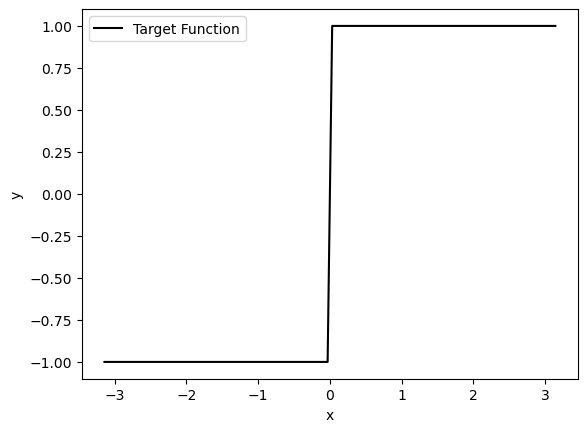

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi,100)
y= np.sign(x)

plt.plot(x,y,'k',label='Target Function')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

fighand = plt.gca()

In [12]:
runtest(["test_step1", "test_step2", "test_plot1"])

Variable x is correct!              


Variable y is correct!              


Dataset Target Function plotted correctly!


Plot is correct!




## Tasks 2

We are going to implement what is called the Fourier Expansion for our function, $f(x)$. The general form of the Fourier expansion on the range $-1 \leq x \leq 1$ is given by

$$ f(x) = \dfrac{1}{2}a_0 + \sum \limits _{n=1} ^{\infty} \left\{ \phantom{\dfrac{1}{1}} a_n \cos (nx) + b_n \sin(nx) \phantom{\dfrac{1}{1}}\right\} $$


For the particular function we're addressing, the expansion coefficients are given by

\begin{align}
a_n &= 0 \text{ for all } n \\
b_n &= \begin{cases} 0 & \text{ for even } n \\
                     \dfrac{4}{n\pi} & \text{ for odd } n 
       \end{cases}
\end{align}

We're going to write a piece of code which, given the index `n`, evaluates the $b_n$ expansion coefficient. (We don't need to do the $a$ coefficients as they're all zero).

1. Define a function called `fourier_coefficient`, that takes a single input argument, `n`
2. The function should use the formula for the coefficient $b_n$ given above to return the correct value.

To test if a number is even you can use the 'remainder' operator % and an if statement.
```python
4 % 2 = 0
5 % 2 = 1
```

In [8]:
def fourier_coefficient(n):
  if n % 2 == 0:
    return 0
  else:
    return (4/(n*np.pi))


In [9]:
runtest(["test_coefficient"])

Function, fourier_coefficient is correct!              





## Tasks 3

Now that we have a way to calculate the expansion coefficients we need to multiply them by the correct basis function. If we truncate the summation after some (odd) number of terms, `N`, the simplified expansion looks like this:

$$ f(x) = b_1 \sin(x) + b_3 \sin(3x) + \ldots + b_N\sin(Nx)$$

You might also like to look at the solution of the second exercise on for loops in the introduction to python course for help.

1. Define a function `fourier_expand` which takes two arguments, `N` and `x`
2. Within the function, set up a variable to keep the running total of the sum.
3. Within the function, set up a loop which will run over all the integer values of `n` between 1 and `N` inclusive.
4. Within the loop,
     * call the function `fourier_coefficient(n)` to calculate the value of the coefficient.
     * calculate the value of the basis function `sin (nx)`
     * increment (add on) the corresponding term in the summation above to the running total.

The function should return the running total once all the terms have been added on, i.e. the calculated value of the summation.

In [10]:
def fourier_expand(N,x):
  F=0*x
  for n in range(1,N+1,2):
    a=fourier_coefficient(n)
    b= np.sin(n*x)
    F = F + a*b
  return F

In [11]:
runtest(["test_expand"])

Function, fourier_expand is correct!              




## Tasks 4

Now that we have code to compute the Fourier expansion of our function, we should plot the expansion and the original function to see how they compare. We can do this for a range of different values of `N`. In other words, we can see how good an approximation the Fourier expansion is when truncated after a different number of terms.

Adding to your plot of the target function:

1. Using the function `fourier_expand`, define variables `F10`, `F20` and `F50` which contain the fourier expansion evaluated for `N=10`, `20` and 50 respectively, using the (already defined) grid, `x`.
2. Plot the arrays `F10`, `F20` and `F50` in red, blue and green solid lines, respectively.
3. Set the legend labels to 'F10' 'F20' and 'F50', respectively.

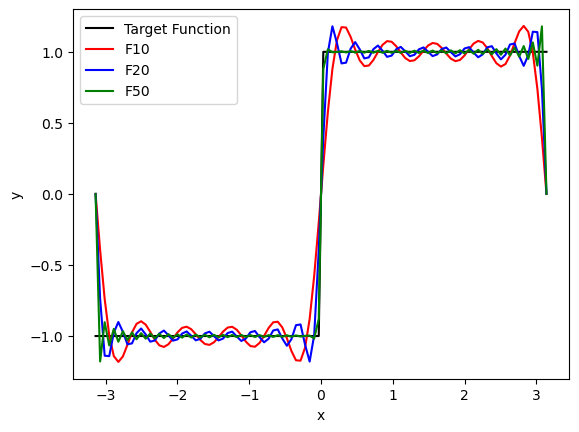

In [13]:
x = np.linspace(-np.pi,np.pi,100)
y= np.sign(x)
F10= fourier_expand(10,x)
F20= fourier_expand(20,x)
F50=fourier_expand(50,x)

plt.plot(x,y,'k',label='Target Function')
plt.plot(x,F10,'r',label="F10")
plt.plot(x,F20,'b',label="F20")
plt.plot(x,F50,'g',label="F50")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

fighand = plt.gca()



In [14]:
runtest(["test_step3", "test_step4", "test_step5", "test_plot2"])

Variable F10 is correct!              


Variable F20 is correct!              


Variable F50 is correct!              


Dataset Target Function plotted correctly!


Dataset F10 plotted correctly!


Dataset F20 plotted correctly!


Dataset F50 plotted correctly!


Plot is correct!


